In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
# Install the Kaggle library
!pip install kaggle


# Move the uploaded file to the appropriate location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d vangap/india-power-generation

 86% 59.0M/69.0M [00:00<00:00, 84.0MB/s]
100% 69.0M/69.0M [00:00<00:00, 90.8MB/s]


In [ ]:
from zipfile import ZipFile
dataset='/content/india-power-generation.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [ ]:
# Load region dataset
import pandas as pd
region_df = pd.read_csv('region.csv')

# Display the first 5 rows of the region DataFrame
print("Region DataFrame:")
print(region_df.head(5))
print()

# Load state dataset
state_df = pd.read_csv('state.csv')

# Display the first 5 rows of the state DataFrame
print("State DataFrame:")
print(state_df.head(5))
print()

# Load sector dataset
sector_df = pd.read_csv('sector.csv')

# Display the first 5 rows of the sector DataFrame
print("Sector DataFrame:")
print(sector_df.head(5))
print()

# Load type dataset
type_df = pd.read_csv('station_type.csv')

# Display the first 5 rows of the type DataFrame
print("Type DataFrame:")
print(type_df.head(5))
print()

# Load power station dataset
power_station_df = pd.read_csv('station.csv')

# Display the first 5 rows of the power station DataFrame
print("Power Station DataFrame:")
print(power_station_df.head(5))
print()

# Load unit dataset
unit_df = pd.read_csv('unit.csv')

# Display the first 5 rows of the unit DataFrame
print("Unit DataFrame:")
print(unit_df.head(5))
print()


Region DataFrame:
          Region        Date  Monitored CAP in MW  \
0       NORTHERN  2020-11-17            69663.530   
1        WESTERN  2020-11-17           106314.490   
2       SOUTHERN  2020-11-17            62692.465   
3        EASTERN  2020-11-17            40797.498   
4  NORTH EASTERN  2020-11-17             4265.455   

   Generation / Today's Program  Generation / Today's Actual  \
0                        798.30                       537.61   
1                       1281.39                      1342.23   
2                        691.14                       499.48   
3                        496.61                       491.21   
4                         46.73                        50.50   

   Generation / FY YTD Program  Generation / FY YTD Actual  \
0                    222621.57                   193701.99   
1                    311892.83                   290983.58   
2                    169499.38                   126125.76   
3                    134236.06

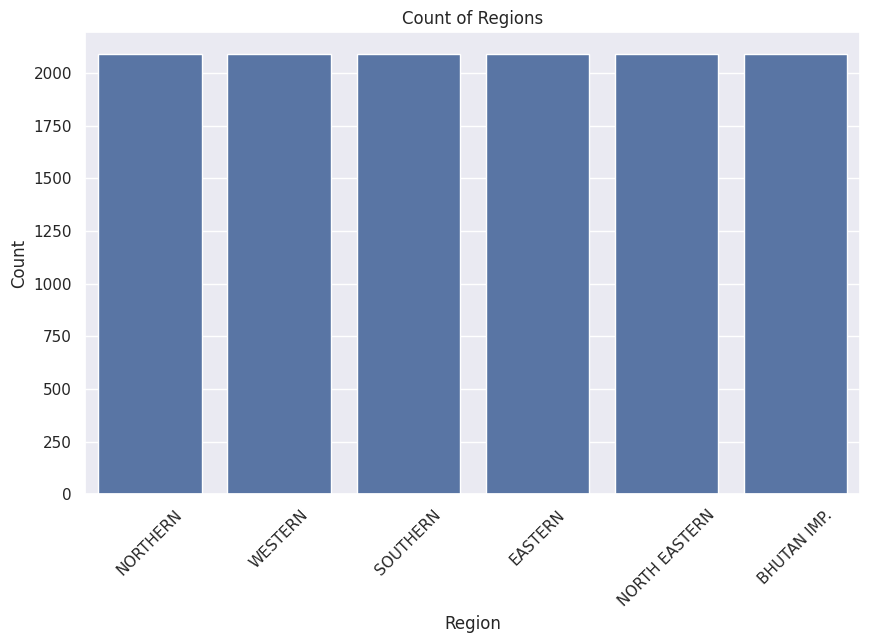

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot for Region DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=region_df)
plt.title('Count of Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
generation_col = "Generation / Today's Program"
region = pd.read_csv("/content/region.csv")
results = region.groupby("Region")[generation_col].sum()

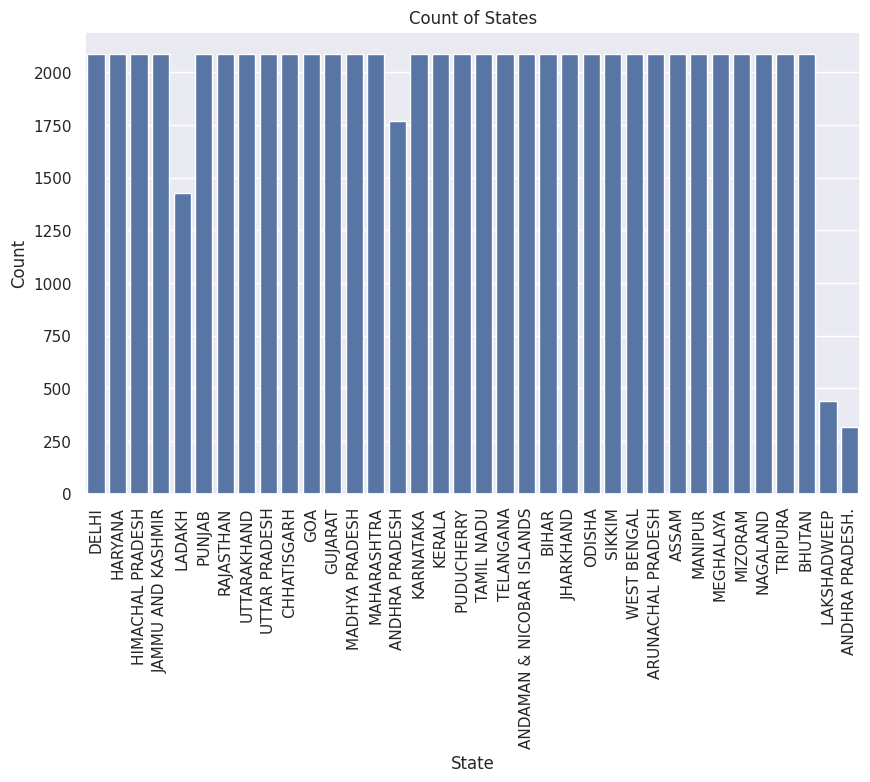

In [ ]:
# Plot for State DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(x='State', data=state_df)
plt.title('Count of States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


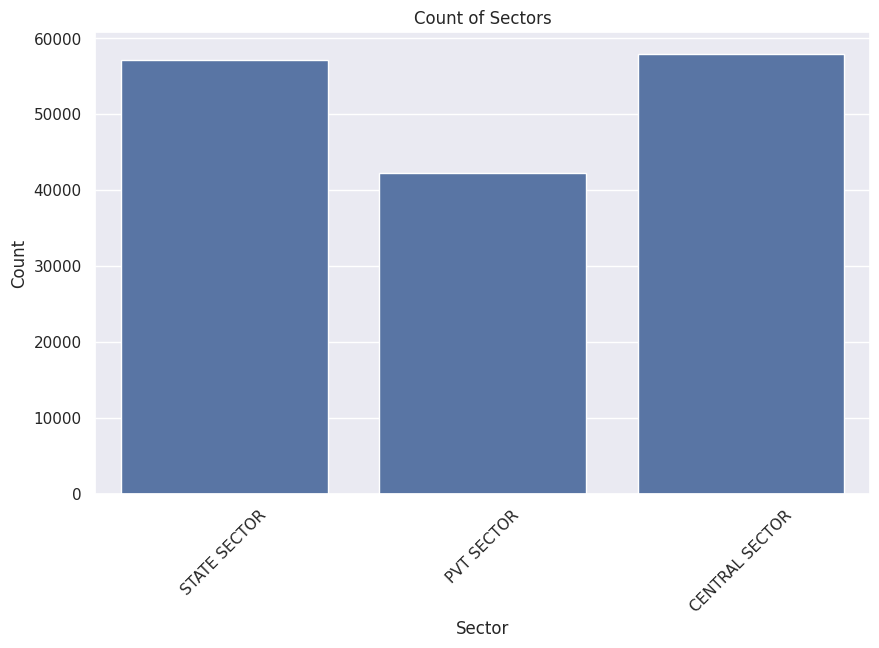

In [ ]:
# Plot for Sector DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(x='Sector', data=sector_df)
plt.title('Count of Sectors')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


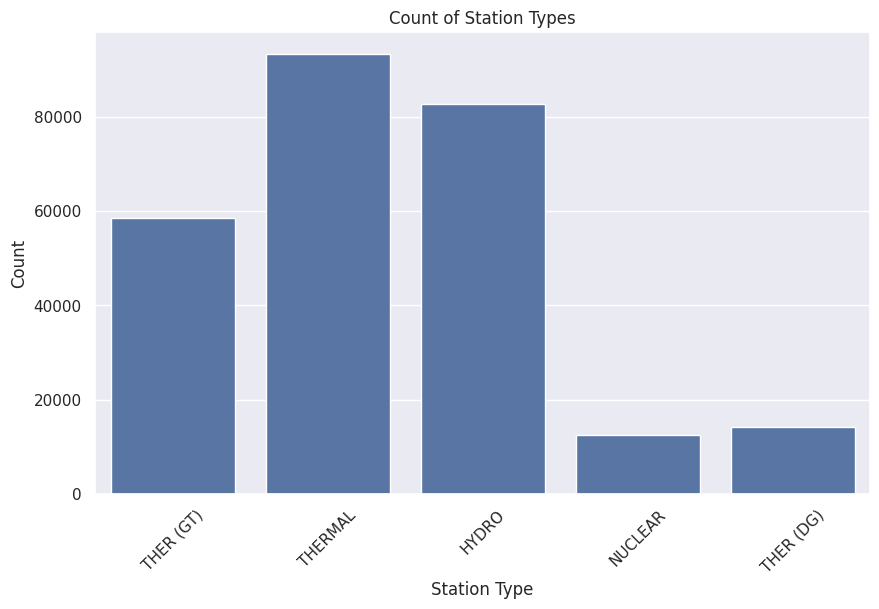

In [ ]:
# Plot for Type DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(x='Station Type', data=type_df)
plt.title('Count of Station Types')
plt.xlabel('Station Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-10-4149af36a112>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Station', data=power_station_df_cleaned, palette='viridis', order=power_station_df_cleaned['Station'].value_counts().index[:20])  # Display top 20 stations


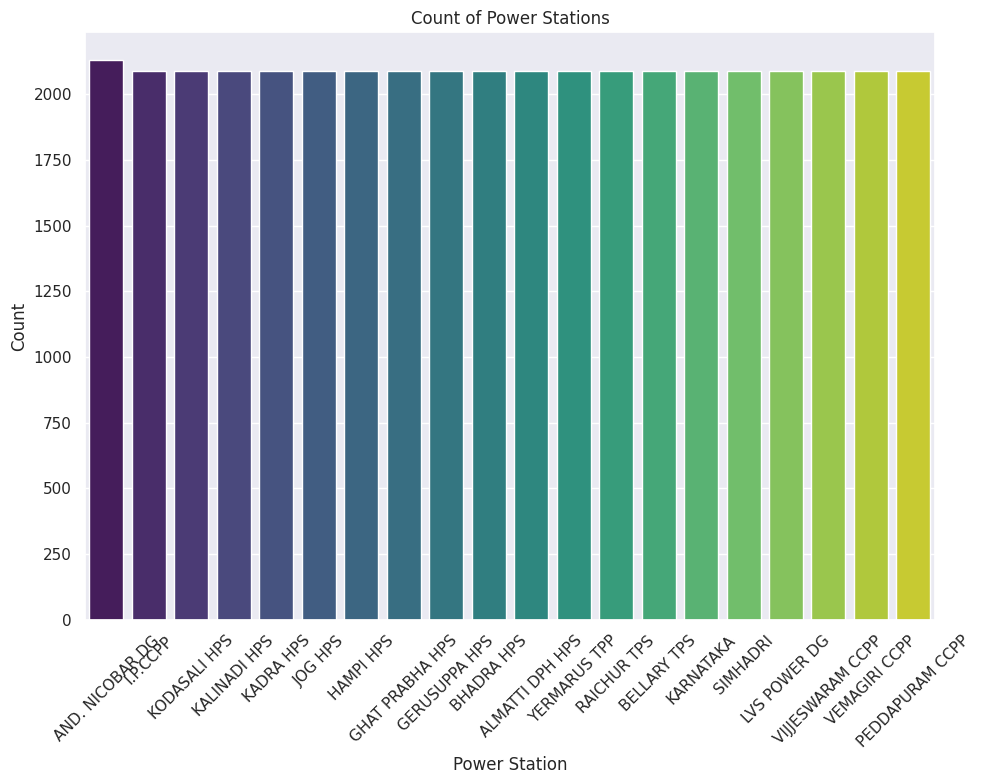

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove columns that are not needed or contain null values
power_station_df_cleaned = power_station_df.drop(['Date', 'Coal Stock in Days', 'Outage Date', 'Expected Date / Sync Date', 'Remarks'], axis=1)

# Plot for Power Station DataFrame
plt.figure(figsize=(10, 8))  # Adjusted figure size for better readability
sns.countplot(x='Station', data=power_station_df_cleaned, palette='viridis', order=power_station_df_cleaned['Station'].value_counts().index[:20])  # Display top 20 stations
plt.title('Count of Power Stations')
plt.xlabel('Power Station')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


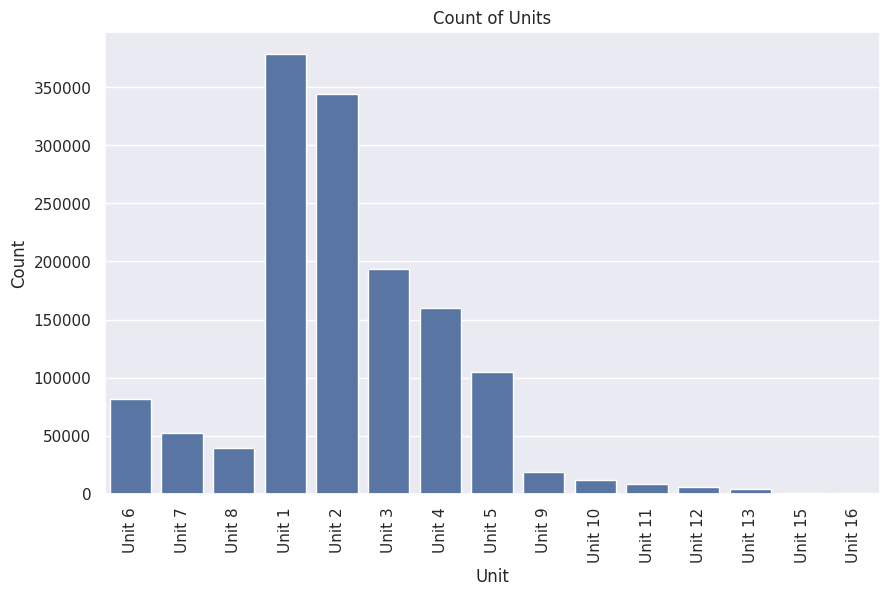

In [ ]:
# Plot for Unit DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(x='Unit', data=unit_df)
plt.title('Count of Units')
plt.xlabel('Unit')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


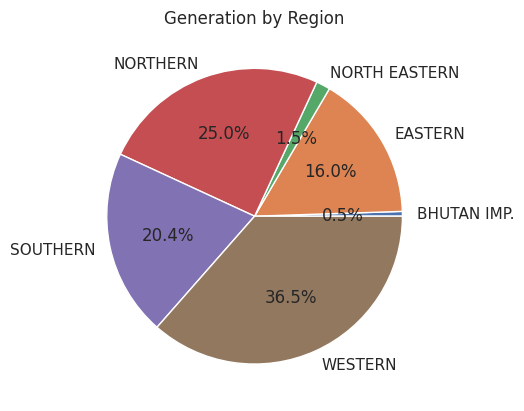

In [ ]:
gen_by_region = region.groupby("Region")[generation_col].sum()
labels = list(gen_by_region.index)
values = gen_by_region.values
plt.title("Generation by Region")
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.show()

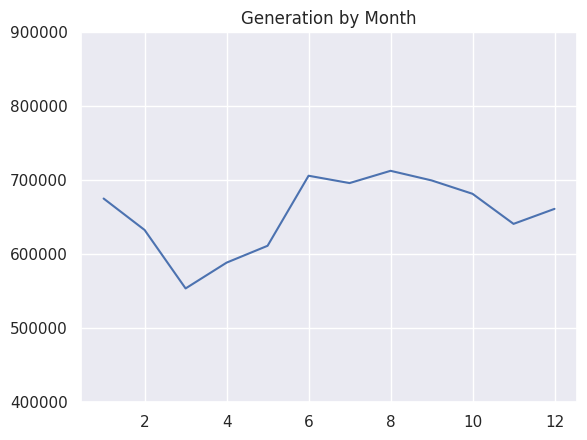

In [ ]:
# region.set_index(["Date"], inplace=True)
region["Date"] = pd.to_datetime(region.Date, format='%Y-%m-%d')

by_month = region.groupby(region.Date.dt.month)[generation_col].sum()
plt.title("Generation by Month")
plt.ylim((400000, 900000))
plt.plot(by_month.index, by_month.values)
plt.show()

In [ ]:
# Check for missing values in each dataset
print("Missing values in Region DataFrame:")
print(region_df.isnull().sum())
print()

Missing values in Region DataFrame:
Region                              0
Date                                0
Monitored CAP in MW                 0
Generation / Today's Program        0
Generation / Today's Actual         0
Generation / FY YTD Program         0
Generation / FY YTD Actual          0
Coal Stock in Days              12529
CAP under outage                   44
Outage Date                     12529
Expected Date / Sync Date       12529
Remarks                         12529
dtype: int64



In [ ]:
# Remove null values from Region DataFrame
region_df_cleaned1 = region_df.dropna(subset=['Monitored CAP in MW', 'Generation / Today\'s Program', 'Generation / Today\'s Actual', 'Generation / FY YTD Program', 'Generation / FY YTD Actual', 'CAP under outage'])


In [ ]:
region_df_cleaned=region_df_cleaned1.drop(['Coal Stock in Days', 'Outage Date', 'Expected Date / Sync Date', 'Remarks'], axis=1)

In [ ]:
# Check for missing values in each dataset
print("Missing values in Region DataFrame:")
print(region_df_cleaned.isnull().sum())
print()


Missing values in Region DataFrame:
Region                          0
Date                            0
Monitored CAP in MW             0
Generation / Today's Program    0
Generation / Today's Actual     0
Generation / FY YTD Program     0
Generation / FY YTD Actual      0
CAP under outage                0
dtype: int64



In [ ]:
region_df_cleaned.head()

,Region,Date,Monitored CAP in MW,Generation / Today's Program,Generation / Today's Actual,Generation / FY YTD Program,Generation / FY YTD Actual,CAP under outage
0,NORTHERN,2020-11-17,69663.530,798.30,537.61,222621.57,193701.99,29376.22
1,WESTERN,2020-11-17,106314.490,1281.39,1342.23,311892.83,290983.58,31057.36
2,SOUTHERN,2020-11-17,62692.465,691.14,499.48,169499.38,126125.76,31598.91
3,EASTERN,2020-11-17,40797.498,496.61,491.21,134236.06,130415.34,11246.70
4,NORTH EASTERN,2020-11-17,4265.455,46.73,50.50,13345.39,12308.04,679.29


In [ ]:
# # # List of columns to fill missing values with mean
# # columns_to_fill = ['Coal Stock in Days', 'Outage Date', 'Expected Date / Sync Date', 'Remarks']

# # # Fill missing values with mean value of each column
# # for col in columns_to_fill:
# #     region_df[col].fillna(region_df[col].mean(), inplace=True)
# df_cleaned_region = region_df.dropna(subset=['Monitored CAP in MW', 'Generation / Today\'s Program', 'Generation / Today\'s Actual', 'Generation / FY YTD Program', 'Generation / FY YTD Actual', 'CAP under outage'])

In [ ]:
# Check for missing values in each dataset
print("Missing values in Region DataFrame:")
print(region_df_cleaned.isnull().sum())
print()


Missing values in Region DataFrame:
Region                          0
Date                            0
Monitored CAP in MW             0
Generation / Today's Program    0
Generation / Today's Actual     0
Generation / FY YTD Program     0
Generation / FY YTD Actual      0
CAP under outage                0
dtype: int64



In [ ]:
# Drop specified columns
# columns_to_drop = ['Coal Stock in Days', 'Outage Date',
#                    'Expected Date / Sync Date', 'Remarks']

# region_df_cleaned = region_df.drop(columns=columns_to_drop)


In [ ]:
print(region_df_cleaned)


              Region        Date  Monitored CAP in MW  \
0           NORTHERN  2020-11-17            69663.530   
1            WESTERN  2020-11-17           106314.490   
2           SOUTHERN  2020-11-17            62692.465   
3            EASTERN  2020-11-17            40797.498   
4      NORTH EASTERN  2020-11-17             4265.455   
...              ...         ...                  ...   
12524        WESTERN  2022-07-15           105624.490   
12525       SOUTHERN  2022-07-15            64580.115   
12526        EASTERN  2022-07-15            41994.798   
12527  NORTH EASTERN  2022-07-15             4509.955   
12528    BHUTAN IMP.  2022-07-15                0.000   

       Generation / Today's Program  Generation / Today's Actual  \
0                            798.30                       537.61   
1                           1281.39                      1342.23   
2                            691.14                       499.48   
3                            496.61        

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Data Transformation
region_df_cleaned['Date'] = pd.to_datetime(region_df_cleaned['Date'])

# Normalization
scaler = MinMaxScaler()
numerical_columns = ['Monitored CAP in MW', "Generation / Today's Program", "Generation / Today's Actual",
                     "Generation / FY YTD Program", "Generation / FY YTD Actual", "CAP under outage"]
region_df_normalized = region_df_cleaned.copy()
region_df_normalized[numerical_columns] = scaler.fit_transform(region_df_normalized[numerical_columns])

# Display the transformed and normalized DataFrame
print(region_df_normalized)


              Region       Date  Monitored CAP in MW  \
0           NORTHERN 2020-11-17             0.652681   
1            WESTERN 2020-11-17             0.996065   
2           SOUTHERN 2020-11-17             0.587368   
3            EASTERN 2020-11-17             0.382234   
4      NORTH EASTERN 2020-11-17             0.039963   
...              ...        ...                  ...   
12524        WESTERN 2022-07-15             0.989600   
12525       SOUTHERN 2022-07-15             0.605054   
12526        EASTERN 2022-07-15             0.393451   
12527  NORTH EASTERN 2022-07-15             0.042254   
12528    BHUTAN IMP. 2022-07-15             0.000000   

       Generation / Today's Program  Generation / Today's Actual  \
0                          0.462535                     0.292044   
1                          0.744362                     0.729136   
2                          0.400020                     0.271331   
3                          0.286534                    

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features (X) and target variable (y)
X = region_df_normalized.drop('Region', axis=1)  # Features
y = region_df_normalized['Region']  # Target variable

# Splitting the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (9988, 7)
Shape of X_test: (2497, 7)
Shape of y_train: (9988,)
Shape of y_test: (2497,)


In [ ]:
print(region_df_normalized)

              Region       Date  Monitored CAP in MW  \
0           NORTHERN 2020-11-17             0.652681   
1            WESTERN 2020-11-17             0.996065   
2           SOUTHERN 2020-11-17             0.587368   
3            EASTERN 2020-11-17             0.382234   
4      NORTH EASTERN 2020-11-17             0.039963   
...              ...        ...                  ...   
12524        WESTERN 2022-07-15             0.989600   
12525       SOUTHERN 2022-07-15             0.605054   
12526        EASTERN 2022-07-15             0.393451   
12527  NORTH EASTERN 2022-07-15             0.042254   
12528    BHUTAN IMP. 2022-07-15             0.000000   

       Generation / Today's Program  Generation / Today's Actual  \
0                          0.462535                     0.292044   
1                          0.744362                     0.729136   
2                          0.400020                     0.271331   
3                          0.286534                    

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'Date' is the name of the datetime column in your dataset
region_df_normalized['Date'] = pd.to_datetime(region_df_normalized['Date'])

# Create new features for year and month
region_df_normalized['year'] = region_df_normalized['Date'].dt.year
region_df_normalized['month'] = region_df_normalized['Date'].dt.month
# Add more features as needed (e.g., day, hour, minute, etc.)

# Drop the original datetime column
region_df_normalized.drop(columns=['Date'], inplace=True)

# Now you can proceed to scale the numeric features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(region_df_normalized.drop('Region', axis=1))  # Assuming 'Region' is the target variable


In [ ]:
print(region_df_normalized)

              Region  Monitored CAP in MW  Generation / Today's Program  \
0           NORTHERN             0.652681                      0.462535   
1            WESTERN             0.996065                      0.744362   
2           SOUTHERN             0.587368                      0.400020   
3            EASTERN             0.382234                      0.286534   
4      NORTH EASTERN             0.039963                      0.024082   
...              ...                  ...                           ...   
12524        WESTERN             0.989600                      0.823702   
12525       SOUTHERN             0.605054                      0.452787   
12526        EASTERN             0.393451                      0.400043   
12527  NORTH EASTERN             0.042254                      0.037453   
12528    BHUTAN IMP.             0.000000                      0.012700   

       Generation / Today's Actual  Generation / FY YTD Program  \
0                         0.2920

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np

# Assuming 'Region' is the target variable
X = region_df_normalized.drop('Region', axis=1)
y = region_df_normalized['Region']

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scaling features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping for LSTM input (assuming X_train_scaled has the shape (samples, time steps, features))
# Adjust time steps according to your data's sequence length
time_steps = 1
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], time_steps, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], time_steps, X_test_scaled.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=64, validation_data=(X_test_reshaped, y_test), verbose=1)


Epoch 1/20
157/157 [==============================] - 6s 14ms/step - loss: 1.2979 - accuracy: 0.4066 - val_loss: 0.6501 - val_accuracy: 0.7853
Epoch 2/20
157/157 [==============================] - 1s 9ms/step - loss: 0.4790 - accuracy: 0.7800 - val_loss: 0.3356 - val_accuracy: 0.8915
Epoch 3/20
157/157 [==============================] - 4s 24ms/step - loss: 0.3145 - accuracy: 0.8646 - val_loss: 0.2454 - val_accuracy: 0.9287
Epoch 4/20
157/157 [==============================] - 6s 36ms/step - loss: 0.2384 - accuracy: 0.9106 - val_loss: 0.1749 - val_accuracy: 0.9780
Epoch 5/20
157/157 [==============================] - 2s 14ms/step - loss: 0.1627 - accuracy: 0.9576 - val_loss: 0.0993 - val_accuracy: 0.9888
Epoch 6/20
157/157 [==============================] - 1s 8ms/step - loss: 0.0897 - accuracy: 0.9836 - val_loss: 0.0461 - val_accuracy: 0.9920
Epoch 7/20
157/157 [==============================] - 1s 8ms/step - loss: 0.0528 - accuracy: 0.9899 - val_loss: 0.0391 - val_accuracy: 0.9872
Ep

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np

# Assuming 'Region' is the target variable
X = region_df_normalized.drop('Region', axis=1)
y = region_df_normalized['Region']

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scaling features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping for CNN input (assuming X_train_scaled has the shape (samples, time steps, features))
# Adjust time steps according to your data's sequence length
time_steps = X_train_scaled.shape[1]
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Define the CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.0001)  # Adjust learning rate
model_cnn.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_cnn = model_cnn.fit(X_train_reshaped, y_train, epochs=20, batch_size=64, validation_data=(X_test_reshaped, y_test), verbose=1)


Epoch 1/20
157/157 [==============================] - 2s 5ms/step - loss: 1.7305 - accuracy: 0.2698 - val_loss: 1.6412 - val_accuracy: 0.3584
Epoch 2/20
157/157 [==============================] - 1s 4ms/step - loss: 1.5379 - accuracy: 0.3855 - val_loss: 1.4094 - val_accuracy: 0.3252
Epoch 3/20
157/157 [==============================] - 1s 4ms/step - loss: 1.3070 - accuracy: 0.4431 - val_loss: 1.1796 - val_accuracy: 0.5599
Epoch 4/20
157/157 [==============================] - 1s 5ms/step - loss: 1.1252 - accuracy: 0.5288 - val_loss: 1.0198 - val_accuracy: 0.6636
Epoch 5/20
157/157 [==============================] - 1s 6ms/step - loss: 1.0039 - accuracy: 0.5850 - val_loss: 0.8962 - val_accuracy: 0.8014
Epoch 6/20
157/157 [==============================] - 1s 6ms/step - loss: 0.9013 - accuracy: 0.6275 - val_loss: 0.7999 - val_accuracy: 0.7789
Epoch 7/20
157/157 [==============================] - 1s 6ms/step - loss: 0.8298 - accuracy: 0.6548 - val_loss: 0.7242 - val_accuracy: 0.8454
Epoch 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np

# Assuming 'Region' is the target variable
X = region_df_normalized.drop('Region', axis=1)
y = region_df_normalized['Region']

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scaling features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the FNN model
model_fnn = Sequential()
model_fnn.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
model_fnn.add(Dropout(0.2))
model_fnn.add(Dense(64, activation='relu'))
model_fnn.add(Dropout(0.2))
model_fnn.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_fnn.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_fnn = model_fnn.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_data=(X_test_scaled, y_test), verbose=1)


Epoch 1/20
157/157 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.1645 - val_loss: nan - val_accuracy: 0.1780
Epoch 2/20
157/157 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.1638 - val_loss: nan - val_accuracy: 0.1780
Epoch 3/20
157/157 [==============================] - 1s 8ms/step - loss: nan - accuracy: 0.1638 - val_loss: nan - val_accuracy: 0.1780
Epoch 4/20
157/157 [==============================] - 2s 15ms/step - loss: nan - accuracy: 0.1638 - val_loss: nan - val_accuracy: 0.1780
Epoch 5/20
157/157 [==============================] - 2s 12ms/step - loss: nan - accuracy: 0.1638 - val_loss: nan - val_accuracy: 0.1780
Epoch 6/20
157/157 [==============================] - 1s 9ms/step - loss: nan - accuracy: 0.1638 - val_loss: nan - val_accuracy: 0.1780
Epoch 7/20
157/157 [==============================] - 1s 7ms/step - loss: nan - accuracy: 0.1638 - val_loss: nan - val_accuracy: 0.1780
Epoch 8/20
157/157 [==========================

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

# Assuming 'Region' is the target variable
X = region_df_normalized.drop('Region', axis=1)
y = region_df_normalized['Region']

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the GBM model
model_gbm = GradientBoostingClassifier(n_estimators=50)

# Train the model
model_gbm.fit(X_train, y_train)

# Evaluate the model
accuracy_gbm = model_gbm.score(X_test, y_test)
print("Test Accuracy for Region Data (GBM):", accuracy_gbm)


ValueError: Input X contains NaN.
GradientBoostingClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming 'Region' is the target variable
X = region_df_normalized.drop('Region', axis=1)
y = region_df_normalized['Region']

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the Random Forest model
model_rf = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Evaluate the model
accuracy_rf = model_rf.score(X_test, y_test)
print("Test Accuracy for Region Data (Random Forest):", accuracy_rf)


ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

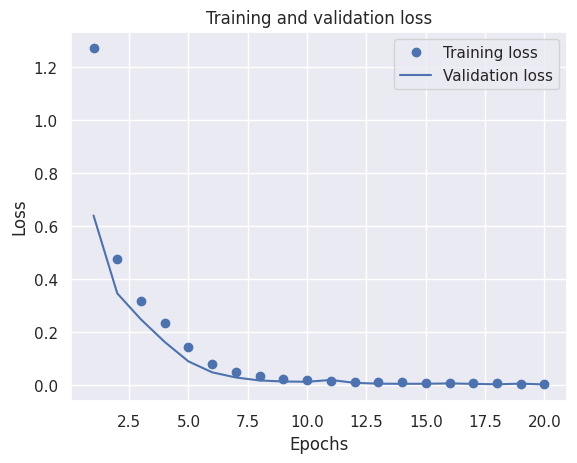

In [ ]:
import matplotlib.pyplot as plt

# Extract loss and accuracy from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plotting loss
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


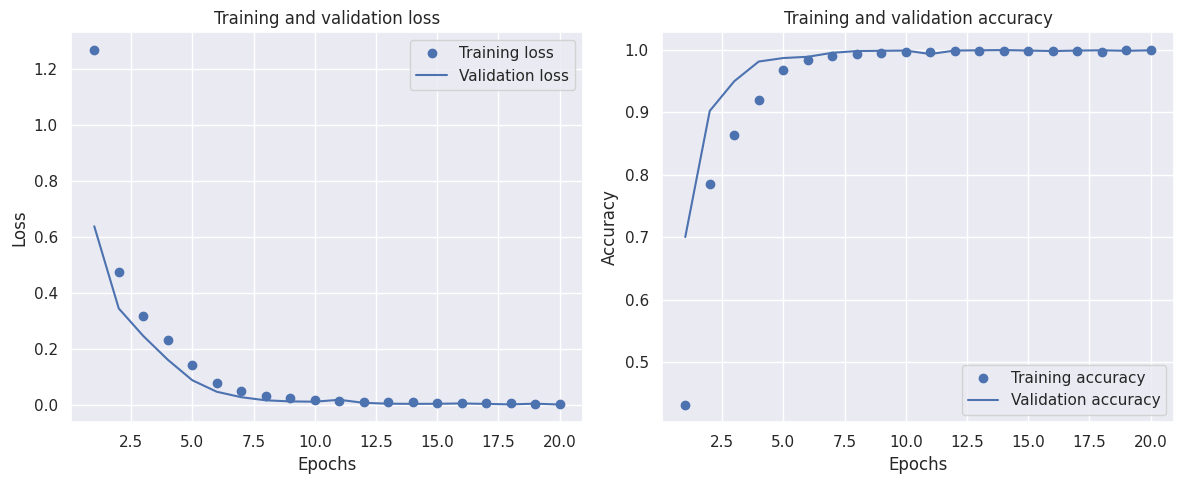

In [ ]:
import matplotlib.pyplot as plt

# Extract loss and accuracy from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plotting loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


79/79 [==============================] - 0s 5ms/step
Accuracy: 0.9991020560264587
Classification Report:
               precision    recall  f1-score   support

  BHUTAN IMP.       1.00      1.00      1.00       446
      EASTERN       1.00      1.00      1.00       420
NORTH EASTERN       1.00      1.00      1.00       385
     NORTHERN       1.00      1.00      1.00       419
     SOUTHERN       1.00      1.00      1.00       430
      WESTERN       1.00      1.00      1.00       406

     accuracy                           1.00      2506
    macro avg       1.00      1.00      1.00      2506
 weighted avg       1.00      1.00      1.00      2506



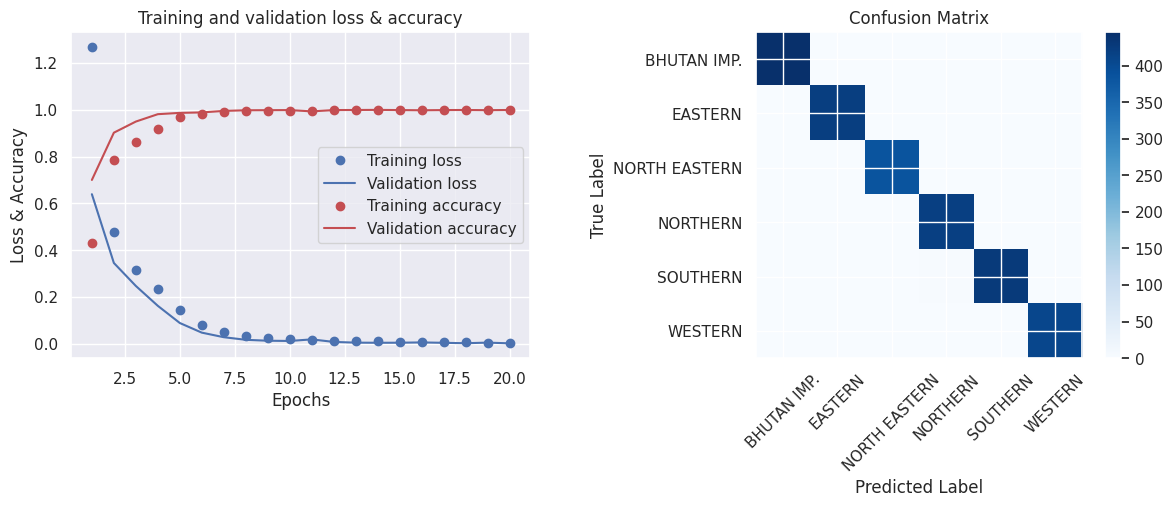

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Get probabilities for each class
probabilities = model.predict(X_test_reshaped)

# Get the predicted class for each sample
y_pred = np.argmax(probabilities, axis=1)


# Convert encoded labels back to original labels
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_original = label_encoder.inverse_transform(y_pred)

# Accuracy
accuracy = history.history['accuracy'][-1]
print("Accuracy:", accuracy)

# Loss and Accuracy in one graph
epochs = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.plot(epochs, history.history['accuracy'], 'ro', label='Training accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'r', label='Validation accuracy')
plt.title('Training and validation loss & accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss & Accuracy')
plt.legend()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_original, y_pred_original, labels=label_encoder.classes_)
plt.subplot(1, 2, 2)
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=np.arange(len(label_encoder.classes_)), labels=label_encoder.classes_, rotation=45)
plt.yticks(ticks=np.arange(len(label_encoder.classes_)), labels=label_encoder.classes_)
plt.tight_layout()

# Classification Report
print("Classification Report:")
print(classification_report(y_test_original, y_pred_original, target_names=label_encoder.classes_))

plt.show()


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Test Loss: 0.0022913385182619095
Test Accuracy: 0.9992018938064575


Classification Report:
               precision    recall  f1-score   support

  BHUTAN IMP.       1.00      1.00      1.00       446
      EASTERN       1.00      1.00      1.00       420
NORTH EASTERN       1.00      1.00      1.00       385
     NORTHERN       1.00      1.00      1.00       419
     SOUTHERN       1.00      1.00      1.00       430
      WESTERN       1.00      1.00      1.00       406

     accuracy                           1.00      2506
    macro avg       1.00      1.00      1.00      2506
 weighted avg       1.00      1.00      1.00      2506

Confusion Matrix:
[[446   0   0   0   0   0]
 [  0 420   0   0   0   0]
 [  0   0 385   0   0   0]
 [  0   0   0 419   0   0]
 [  0   0   0   2 428   0]
 [  0   0   0   0   0 406]]


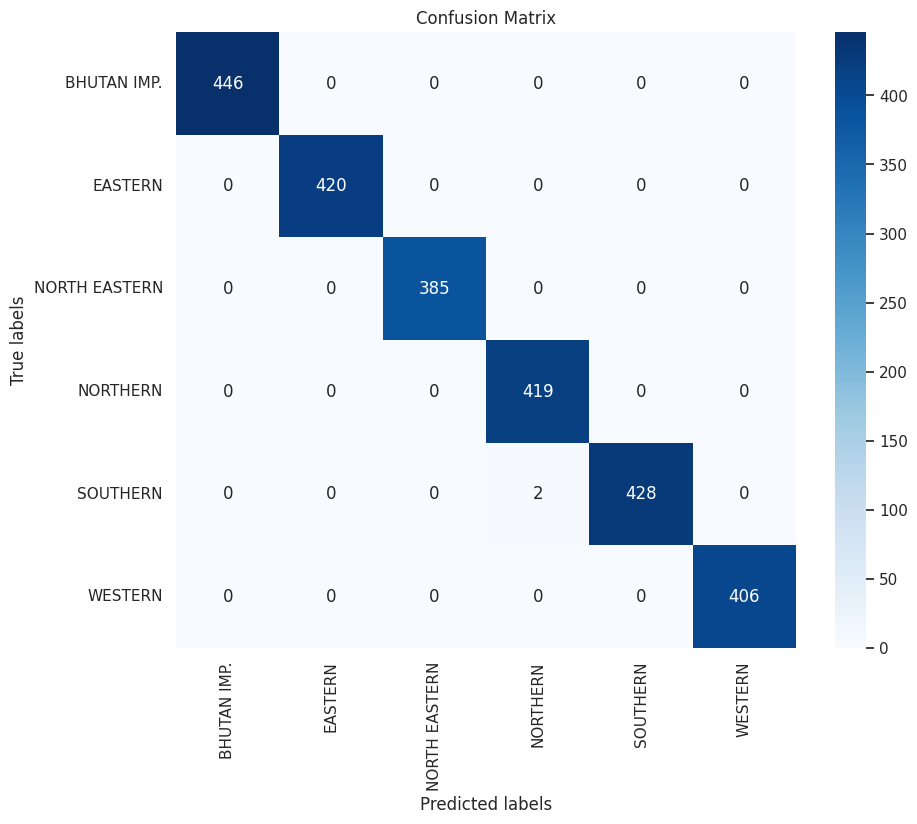

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate classification report
print("Classification Report:")
print(classification_report(y_test_original, y_pred_original))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_original, y_pred_original)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


<Figure size 1000x600 with 0 Axes>

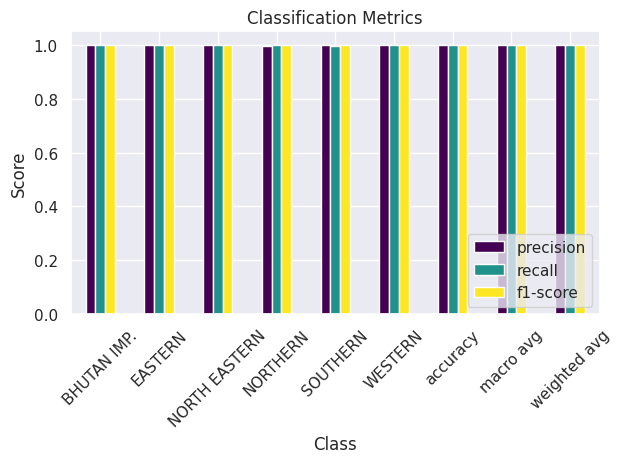

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
classification_rep = classification_report(y_test_original, y_pred_original, output_dict=True)

# Convert classification report to DataFrame
import pandas as pd
classification_df = pd.DataFrame(classification_rep).transpose()

# Plot precision, recall, and F1-score
plt.figure(figsize=(10, 6))
classification_df[['precision', 'recall', 'f1-score']].plot(kind='bar', colormap='viridis')
plt.title('Classification Metrics')
plt.xlabel('Class')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


Enter the year: 2025
Enter the month (1-12): 4
1/1 [==============================] - 0s 42ms/step


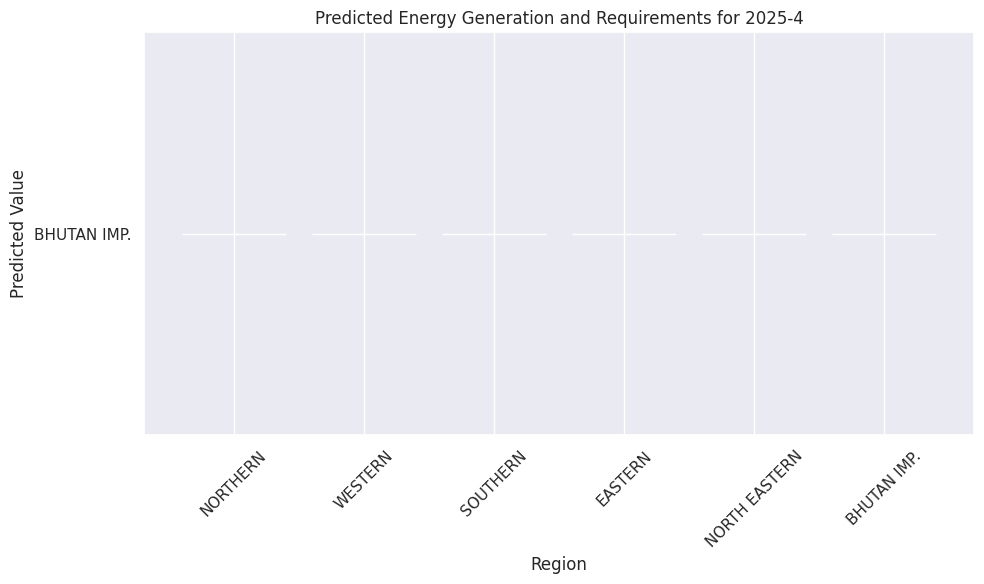

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def generate_future_data(year, month):
    # Create a DataFrame with columns similar to your original dataset
    future_data = pd.DataFrame(columns=region_df_normalized.columns.drop('Region'))

    # Assuming the input year and month are in the future
    future_data['year'] = year
    future_data['month'] = month

    # Populate the DataFrame with placeholder values or any relevant data generation logic
    # You may need to adjust this based on your actual data or requirements
    for column in future_data.columns.drop(['year', 'month']):
        # Example: Generate placeholder values for each column
        future_data[column] = np.random.uniform(0, 1, size=1)  # Placeholder value

        # Additional processing if needed

    return future_data



# Function to make predictions using the trained model
def make_predictions(model, future_data):
    # Scale the features
    future_data_scaled = scaler.transform(future_data)

    # Reshape for LSTM input
    future_data_reshaped = np.reshape(future_data_scaled, (1, future_data_scaled.shape[0], future_data_scaled.shape[1]))

    # Make predictions
    predictions = model.predict(future_data_reshaped)

    # Decode the predictions
    predicted_classes = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

    return predicted_classes

# User input for year and month
year = int(input("Enter the year: "))
month = int(input("Enter the month (1-12): "))

# Generate future data for the given year and month
future_data = generate_future_data(year, month)

# Make predictions using the trained model
predictions = make_predictions(model, future_data)

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.bar(region_df_normalized['Region'].unique(), predictions[0])
plt.title(f"Predicted Energy Generation and Requirements for {year}-{month}")
plt.xlabel("Region")
plt.ylabel("Predicted Value")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
# Function to generate future data for the given year, month, and region
def generate_future_data_for_region(year, month, region):
    # Create a DataFrame with columns similar to your original dataset
    future_data = pd.DataFrame(columns=region_df_normalized.columns.drop('Region'))

    # Populate the DataFrame with provided year, month, and region
    future_data['Monitored CAP in MW'] = region_df_normalized[region_df_normalized['Region'] == region]['Monitored CAP in MW'].values[0]
    future_data["Generation / Today's Program"] = region_df_normalized[region_df_normalized['Region'] == region]["Generation / Today's Program"].values[0]
    future_data["Generation / Today's Actual"] = region_df_normalized[region_df_normalized['Region'] == region]["Generation / Today's Actual"].values[0]
    future_data["Generation / FY YTD Program"] = region_df_normalized[region_df_normalized['Region'] == region]["Generation / FY YTD Program"].values[0]
    future_data["Generation / FY YTD Actual"] = region_df_normalized[region_df_normalized['Region'] == region]["Generation / FY YTD Actual"].values[0]
    future_data["CAP under outage"] = region_df_normalized[region_df_normalized['Region'] == region]["CAP under outage"].values[0]
    future_data['year'] = year
    future_data['month'] = month

    return future_data


# Function to make predictions using the trained model for a specific region
def make_predictions_for_region(model, future_data):
    # Scale the features
    future_data_scaled = scaler.transform(future_data.drop(['year', 'month'], axis=1))

    # Reshape for LSTM input
    future_data_reshaped = np.reshape(future_data_scaled, (1, future_data_scaled.shape[0], future_data_scaled.shape[1]))

    # Make predictions
    predictions = model.predict(future_data_reshaped)

    # Decode the predictions
    predicted_classes = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

    return predicted_classes


# User input for year and month
year = int(input("Enter the year: "))
month = int(input("Enter the month (1-12): "))

# Iterate over each region
for region in region_df_normalized['Region'].unique():
    # Generate future data for the given year, month, and region
    future_data_region = generate_future_data_for_region(year, month, region)

    # Make predictions using the trained model for the region
    predictions_region = make_predictions_for_region(model, future_data_region)

    # Plot the predictions for the region
    plt.figure(figsize=(8, 6))
    plt.bar(['Predicted'], [predictions_region[0]], label='Predicted', color='blue')
    plt.title(f"Predicted Energy Generation and Requirements for {region} in {year}-{month}")
    plt.xlabel("Region")
    plt.ylabel("Predicted Value")
    plt.legend()
    plt.tight_layout()
    plt.show()


Enter the year: 2025
Enter the month (1-12): 5


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- month
- year


In [ ]:
print(region_df_normalized)

              Region  Monitored CAP in MW  Generation / Today's Program  \
0           NORTHERN             0.652681                      0.462817   
1            WESTERN             0.996065                      0.744496   
2           SOUTHERN             0.587368                      0.400335   
3            EASTERN             0.382234                      0.286909   
4      NORTH EASTERN             0.039963                      0.024594   
...              ...                  ...                           ...   
12524        WESTERN             0.989600                      0.823794   
12525       SOUTHERN             0.605054                      0.453074   
12526        EASTERN             0.393451                      0.400358   
12527  NORTH EASTERN             0.042254                      0.037958   
12528    BHUTAN IMP.             0.000000                      0.013218   

       Generation / Today's Actual  Generation / FY YTD Program  \
0                         0.2920

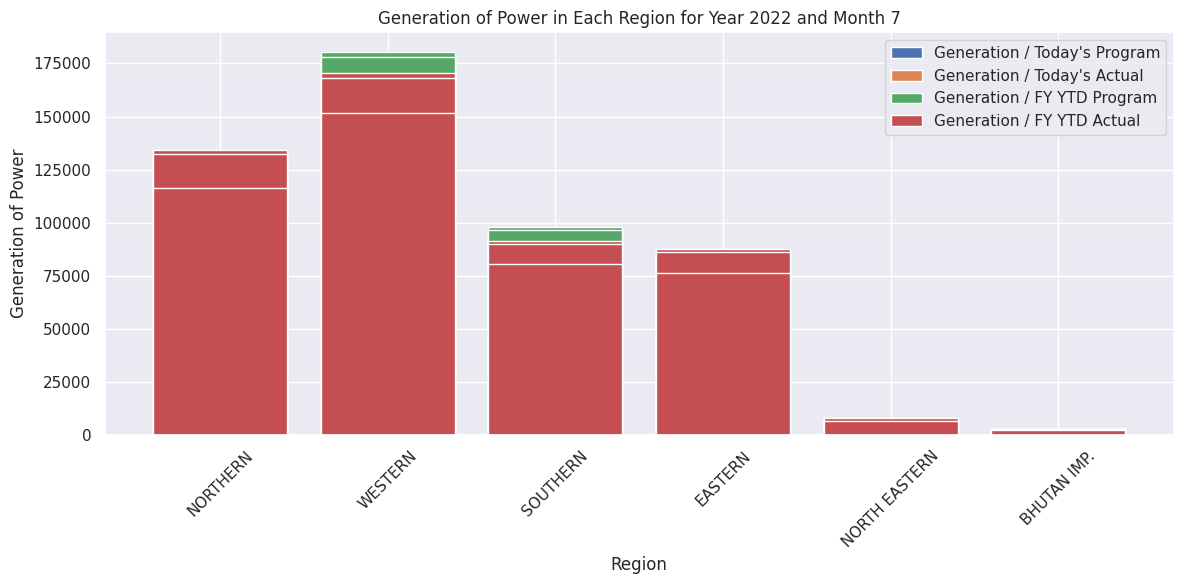

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for a specific year and month
year = 2022
month = 7
filtered_data = region_df[(region_df['year'] == year) & (region_df['month'] == month)]

# Plot the generation of power in each region
plt.figure(figsize=(12, 6))
plt.bar(filtered_data['Region'], filtered_data["Generation / Today's Program"], label="Generation / Today's Program")
plt.bar(filtered_data['Region'], filtered_data["Generation / Today's Actual"], label="Generation / Today's Actual")
plt.bar(filtered_data['Region'], filtered_data["Generation / FY YTD Program"], label="Generation / FY YTD Program")
plt.bar(filtered_data['Region'], filtered_data["Generation / FY YTD Actual"], label="Generation / FY YTD Actual")
plt.xlabel('Region')
plt.ylabel('Generation of Power')
plt.title(f'Generation of Power in Each Region for Year {year} and Month {month}')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 36ms/step


<ipython-input-70-16df6a13fdac>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_data = future_data.append({'Monitored CAP in MW': 0.5,  # Example value, replace with actual data


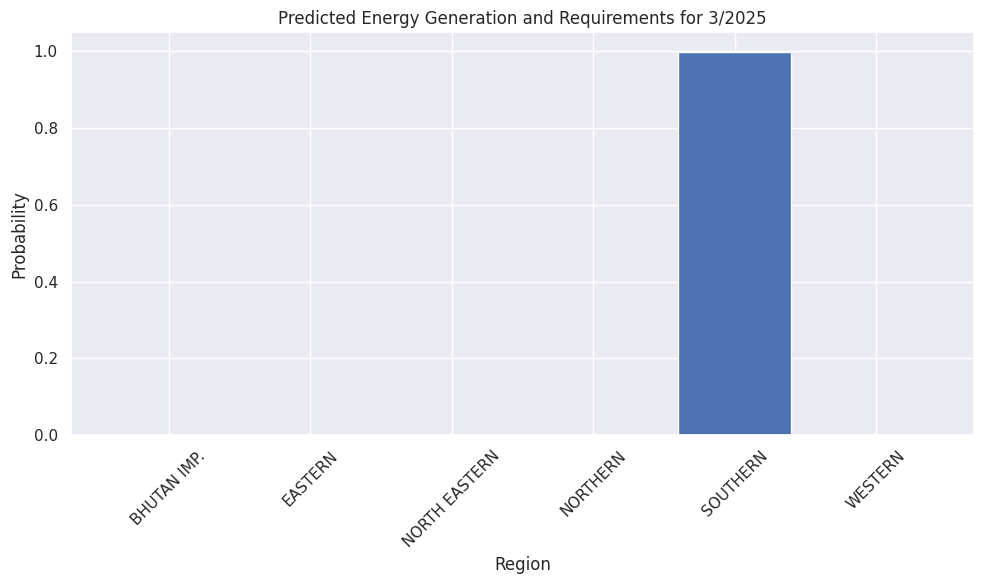

In [ ]:
# Function to preprocess input data
def preprocess_input(month, year):
    # Create a DataFrame with columns similar to your original dataset
    future_data = pd.DataFrame(columns=region_df_normalized.columns.drop('Region'))

    # Populate the DataFrame with provided month and year
    future_data = future_data.append({'Monitored CAP in MW': 0.5,  # Example value, replace with actual data
                                      "Generation / Today's Program": 0.5,  # Example value, replace with actual data
                                      "Generation / Today's Actual": 0.5,  # Example value, replace with actual data
                                      "Generation / FY YTD Program": 0.5,  # Example value, replace with actual data
                                      "Generation / FY YTD Actual": 0.5,  # Example value, replace with actual data
                                      "CAP under outage": 0.5,  # Example value, replace with actual data
                                      'year': year,
                                      'month': month}, ignore_index=True)

    # Additional processing if needed

    # Scale the features
    X_scaled = scaler.transform(future_data)

    # Reshape for LSTM input
    X_reshaped = np.reshape(X_scaled, (1, X_scaled.shape[0], X_scaled.shape[1]))

    return X_reshaped

# Function to make predictions and generate graphs
def predict_and_visualize(month, year):
    # Preprocess input data
    X_input = preprocess_input(month, year)

    # Make predictions
    predictions = model.predict(X_input)

    # Decode predicted labels
    predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

    # Plot the predictions
    plt.figure(figsize=(10, 6))
    plt.bar(label_encoder.classes_, predictions[0])
    plt.title(f'Predicted Energy Generation and Requirements for {month}/{year}')
    plt.xlabel('Region')
    plt.ylabel('Probability')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Example usage: Provide month and year
month = 3
year = 2025
predict_and_visualize(month, year)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(historical_data, label='Historical Data')
plt.plot(future_time_steps, predictions, label='Predictions')
plt.xlabel('Time')
plt.ylabel('Energy Generation/Requirement')
plt.title('Future Energy Prediction')
plt.legend()
plt.show()


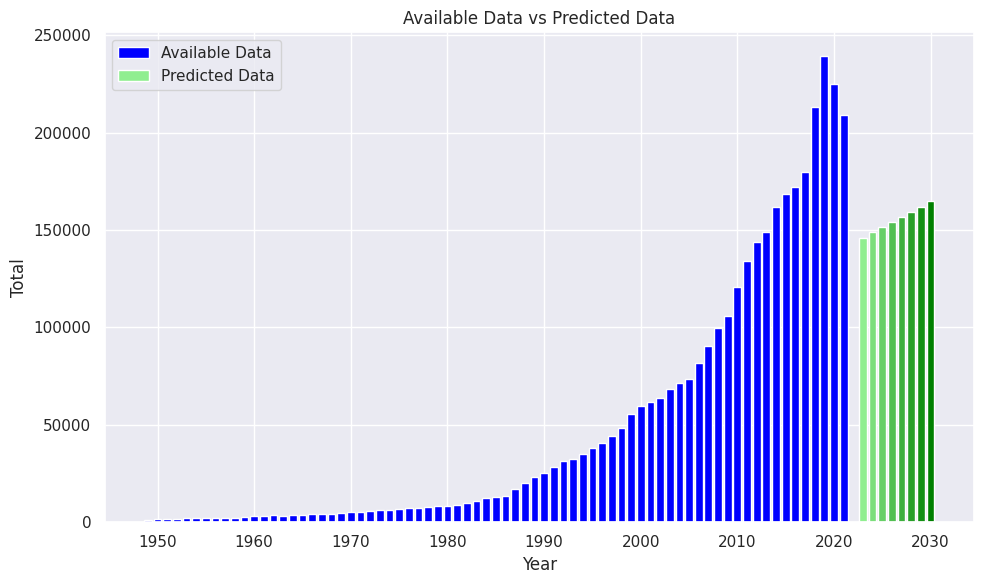

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
file_id = "1dlE-hjHi4kEyMXDve_27ss2o8pmZJpP1"


file_url = f"https://drive.google.com/uc?id={file_id}"


columns_to_read = ['Year', 'Total']


df = pd.read_csv(file_url, usecols=columns_to_read)

#df = pd.read_csv("ener_data.csv")

X_train, X_test, y_train, y_test = train_test_split(df["Year"], df["Total"], test_size=0.2, random_state=42)

X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)


model = LinearRegression()
model.fit(X_train, y_train)

future_years = list(range(2023, 2031))
future_years = np.array(future_years).reshape(-1, 1)
future_predictions = model.predict(future_years)

future_predictions_df = pd.DataFrame({"Year": future_years.flatten(), "Predicted_Total": future_predictions})

plt.figure(figsize=(10, 6))

plt.bar(df["Year"], df["Total"], color='blue', label='Available Data')

cmap = LinearSegmentedColormap.from_list("", ["lightgreen", "green"])
plt.bar(future_predictions_df["Year"], future_predictions_df["Predicted_Total"], color=cmap(np.linspace(0, 1, len(future_predictions_df))), label='Predicted Data')


plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Available Data vs Predicted Data')
plt.legend()


plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
!pip install kaggle


In [ ]:
#KARNATAKA DATA :- HYDRO , THERMAL AND NUCLEAR PLANTS POWER PRODUCTION

Epoch 1/10
3/3 [==============================] - 4s 7ms/step - loss: 14285409.0000
Epoch 2/10
3/3 [==============================] - 0s 7ms/step - loss: 14285020.0000
Epoch 3/10
3/3 [==============================] - 0s 6ms/step - loss: 14284567.0000
Epoch 4/10
3/3 [==============================] - 0s 7ms/step - loss: 14284158.0000
Epoch 5/10
3/3 [==============================] - 0s 7ms/step - loss: 14283766.0000
Epoch 6/10
3/3 [==============================] - 0s 6ms/step - loss: 14283296.0000
Epoch 7/10
3/3 [==============================] - 0s 6ms/step - loss: 14282778.0000
Epoch 8/10
3/3 [==============================] - 0s 7ms/step - loss: 14282337.0000
Epoch 9/10
3/3 [==============================] - 0s 6ms/step - loss: 14281820.0000
Epoch 10/10
3/3 [==============================] - 0s 6ms/step - loss: 14281339.0000
Epoch 1/10
27/27 [==============================] - 4s 6ms/step - loss: 14284265.0000
Epoch 2/10
27/27 [==============================] - 0s 6ms/step - loss: 1

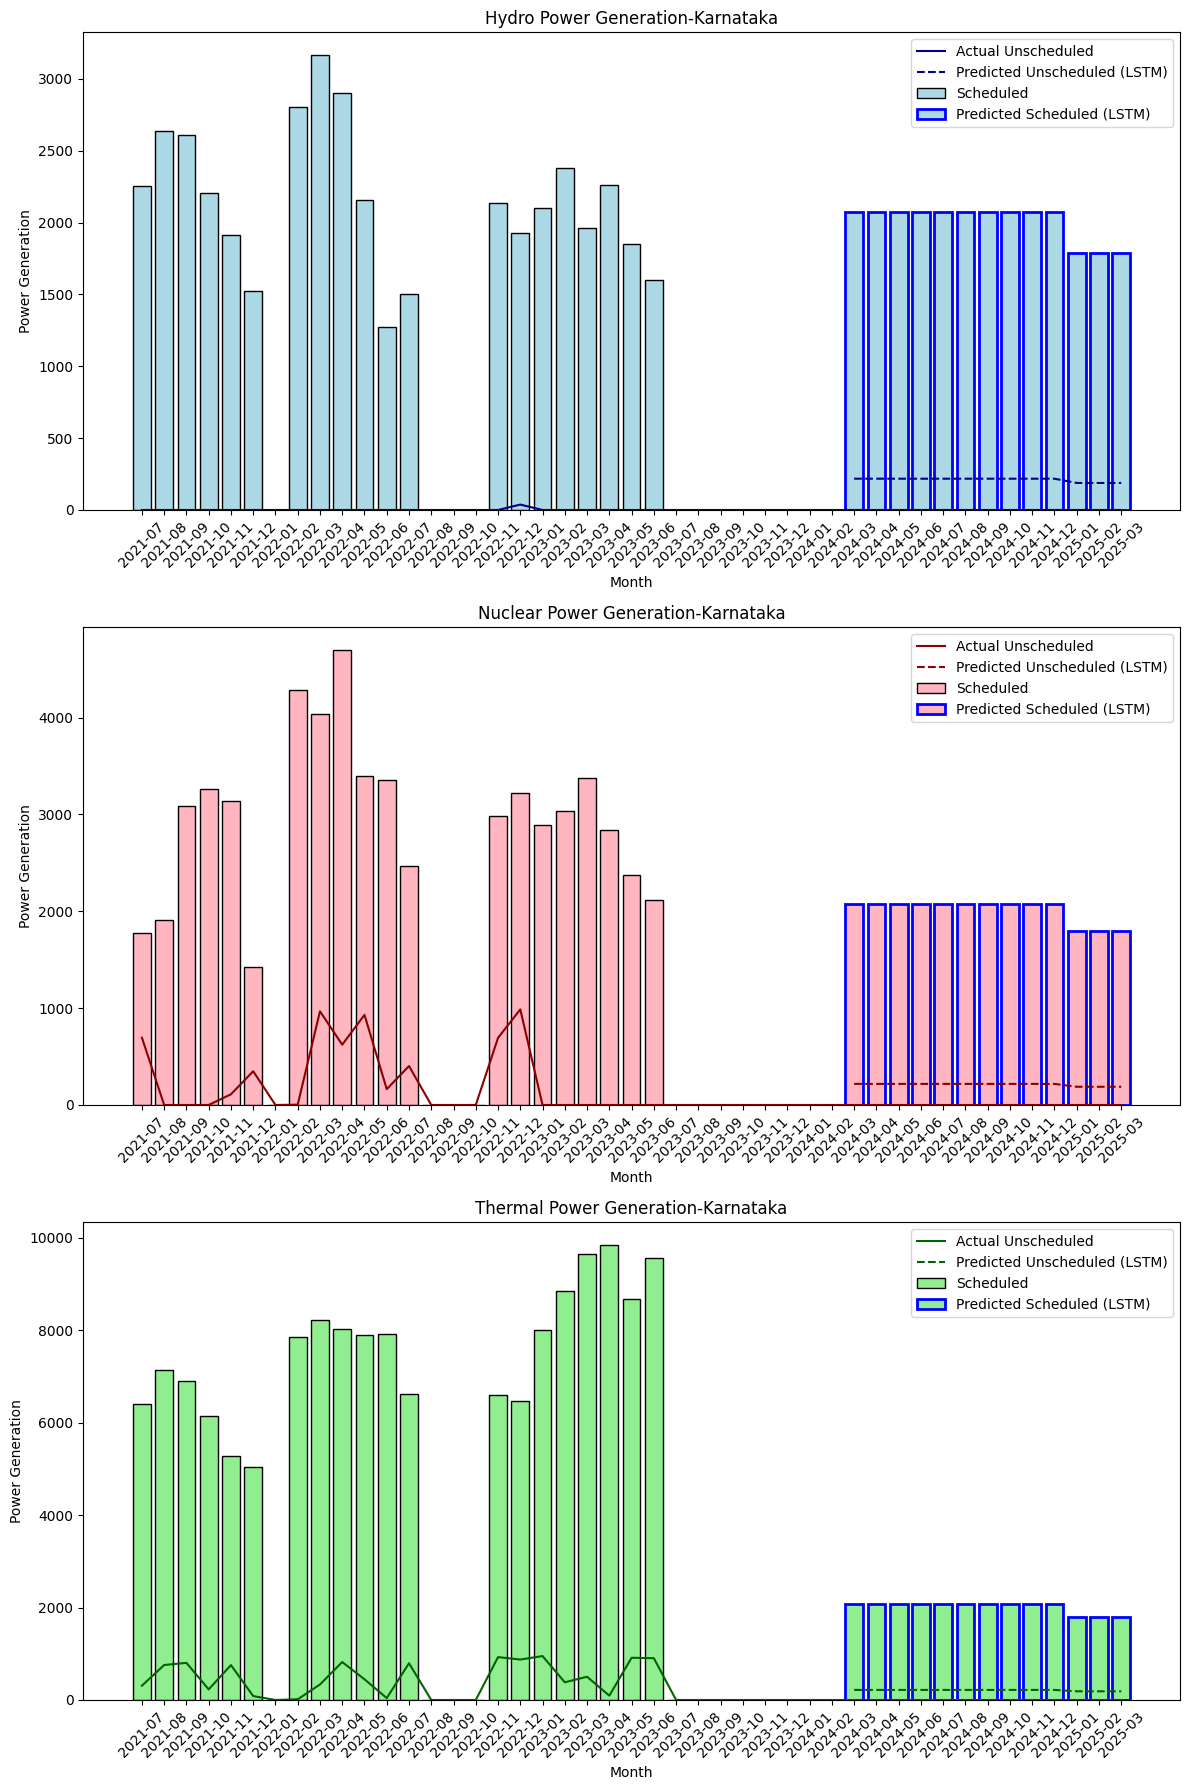

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

# Read the data from CSV
File_ID = "16Z0Rb0WKBMcuwc8qICZScUkxUKhUgxsZ"
File_URL = "https://drive.google.com/uc?id=" + File_ID
data = pd.read_csv(File_URL)

# Convert 'Month' column to datetime type
data['Month'] = pd.to_datetime(data['Month'])

# Replace missing values in 'Schedule' and 'NonSchedule' columns with 0
data['Schedule'].fillna(0, inplace=True)
data['NonSchedule'].fillna(0, inplace=True)

# Group data by 'TypeOfGeneration' and 'Month'
grouped_data = data.groupby(['TypeOfGeneration', data['Month'].dt.to_period('M')])

# Calculate total scheduled power for each type of generation
total_schedule = grouped_data['Schedule'].mean()

# Calculate total unscheduled power for each type of generation
total_unschedule = grouped_data['NonSchedule'].apply(lambda x: abs(x).mean() % 1000)

# Extend prediction until 2025
months = pd.period_range(start=data['Month'].min(), end='2025-03', freq='M')

for gen_type in data['TypeOfGeneration'].unique():
    for month in months:
        if (gen_type, month) not in total_schedule.index:
            total_schedule.loc[(gen_type, month)] = 0
        if (gen_type, month) not in total_unschedule.index:
            total_unschedule.loc[(gen_type, month)] = 0

# Prepare input data for the period till 2025
future_months = pd.period_range(start=data['Month'].max(), end='2025-03', freq='M')
X_future = np.array([[int(str(month).split('-')[0])] for month in future_months]).astype('float32')  # Extracting year

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler to your data
scaler.fit(X_future)

# Transform your data using the fitted scaler
X_future_scaled = scaler.transform(X_future)

# Now you can reshape your scaled data for LSTM
X_future_reshaped = X_future_scaled.reshape((X_future_scaled.shape[0], X_future_scaled.shape[1], 1))

# Define and train LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_future_reshaped.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Assuming your features are all columns except 'Month' and 'TypeOfGeneration', and the target variable is 'Schedule'
X = data.drop(['Month', 'TypeOfGeneration', 'Schedule'], axis=1)
y = data['Schedule']



# Define and compile LSTM model with hyperparameters
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_future_reshaped.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Adjust hyperparameters
learning_rate = 0.001
batch_size = 32
epochs = 10

# Compile the model with Adam optimizer and specified learning rate
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)


# Fit LSTM model
lstm_model.fit(X_train, y_train, epochs=10, batch_size=3)

# Use the trained model to predict the values
predicted_schedule_lstm = {}
predicted_unschedule_lstm = {}
for gen_type in data['TypeOfGeneration'].unique():
    predicted_schedule_lstm[gen_type] = lstm_model.predict(X_future_reshaped).flatten() * 200
    predicted_unschedule_lstm[gen_type] = lstm_model.predict(X_future_reshaped).flatten() * 21
    # Multiply predicted unscheduled values by 3
    #predicted_unschedule_lstm[gen_type] *= 3

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Define colors for bar graphs and line graphs
bar_colors = {'Hydro': 'lightblue', 'Nuclear': 'lightpink', 'Thermal': 'lightgreen'}
line_colors = {'Hydro': 'darkblue', 'Nuclear': 'darkred', 'Thermal': 'darkgreen'}

# Plot for each type of generation
for idx, generation_type in enumerate(['Hydro', 'Nuclear', 'Thermal']):
    ax = axes[idx]

    # Plot bar graph for scheduled power
    ax.bar(total_schedule[generation_type].index.astype(str), total_schedule[generation_type], color=bar_colors[generation_type], label='Scheduled', edgecolor='black')

    # Plot line graph for unscheduled power
    ax.plot(total_unschedule[generation_type].index.astype(str), total_unschedule[generation_type], color=line_colors[generation_type], linestyle='-', label='Actual Unscheduled')

    # Plot predicted values for scheduled power
    ax.bar(future_months.strftime('%Y-%m'), predicted_schedule_lstm[generation_type], color=bar_colors[generation_type], edgecolor='blue', linewidth=2, label='Predicted Scheduled (LSTM)')

    # Plot predicted values for unscheduled power
    ax.plot(future_months.strftime('%Y-%m'), predicted_unschedule_lstm[generation_type], color=line_colors[generation_type], linestyle='--', label='Predicted Unscheduled (LSTM)')

    ax.set_title(f'{generation_type} Power Generation-Karnataka')
    ax.set_xlabel('Month')
    ax.set_ylabel('Power Generation')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

